# Лабораторная работа 3
Подготовка обучающей и тестовой выборки, кросс-валидация и подбор гиперпараметров на примере метода ближайших соседей.
Цель лабораторной работы: изучение способов подготовки выборки и подбора гиперпараметров на примере метода ближайших соседей.


Задание:
Выберите набор данных (датасет) для решения задачи классификации или регрессии.
С использованием метода train_test_split разделите выборку на обучающую и тестовую.
Обучите модель ближайших соседей для произвольно заданного гиперпараметра K. Оцените качество модели с помощью подходящих для задачи метрик.
Произведите подбор гиперпараметра K с использованием GridSearchCV и/или RandomizedSearchCV и кросс-валидации, оцените качество оптимальной модели. Желательно использование нескольких стратегий кросс-валидации.
Сравните метрики качества исходной и оптимальной моделей.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

goal_column='TargetClass'

%matplotlib inline 
sns.set(style="ticks")

# скроем предупреждения о возможных ошибках для лучшей читаемости
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./Star3642_balanced.csv')
data.head()

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,5.99,13.73,0.58,1.318,K5III,16.678352,0
1,8.70,2.31,1.29,-0.045,B1II,15.518060,0
2,5.77,5.50,1.03,0.855,G5III,14.471813,0
3,6.72,5.26,0.74,-0.015,B7V,15.324928,1
4,8.76,13.44,1.16,0.584,G0V,19.401997,1


In [3]:
data.shape

(3642, 7)

## Удаление пропусков

Удалим колонки, содержащие пустые значения

In [4]:
data = data.dropna(axis=1, how='any')
data.head()

,Vmag,Plx,e_Plx,B-V,SpType,Amag,TargetClass
0,5.99,13.73,0.58,1.318,K5III,16.678352,0
1,8.70,2.31,1.29,-0.045,B1II,15.518060,0
2,5.77,5.50,1.03,0.855,G5III,14.471813,0
3,6.72,5.26,0.74,-0.015,B7V,15.324928,1
4,8.76,13.44,1.16,0.584,G0V,19.401997,1


In [5]:
data.shape

(3642, 7)

Проверим что пропуски отсутствуют

In [6]:
for col in data.columns:
    null_count = data[data[col].isnull()].shape[0]
    if null_count == 0:
        column_type = data[col].dtype
        print('{} - {} - {}'.format(col, column_type, null_count))

Vmag - float64 - 0
Plx - float64 - 0
e_Plx - float64 - 0
B-V - float64 - 0
SpType - object - 0
Amag - float64 - 0
TargetClass - int64 - 0


## Кодирование категориальных признаков

In [7]:
for col in data.columns:
    column_type = data[col].dtype
    if column_type == 'object':
        print(col)

SpType


In [8]:
le = LabelEncoder()
data['SpType'] = le.fit_transform(data['SpType'])

Проверка

In [9]:
for col in data.columns:
    column_type = data[col].dtype
    if column_type == 'object':
        print(col)

## Разделение выборки на обучающую и тестовую

Разделим данные на целевой столбец и признаки

In [10]:
X = data.drop(goal_column, axis=1)
X

,Vmag,Plx,e_Plx,B-V,SpType,Amag
0,5.99,13.73,0.58,1.318,522,16.678352
1,8.70,2.31,1.29,-0.045,99,15.518060
2,5.77,5.50,1.03,0.855,337,14.471813
3,6.72,5.26,0.74,-0.015,150,15.324928
4,8.76,13.44,1.16,0.584,293,19.401997
...,...,...,...,...,...,...
3637,7.29,3.26,0.95,1.786,515,14.856089
3638,8.29,6.38,1.00,0.408,208,17.314104
3639,6.11,2.42,0.79,1.664,539,13.029078
3640,7.94,4.94,2.90,0.210,53,16.408636


In [11]:
Y = data[[goal_column]]
Y

,TargetClass
0,0
1,0
2,0
3,1
4,1
...,...
3637,0
3638,1
3639,0
3640,1


С использованием метода train_test_split разделим выборку на обучающую и тестовую

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

In [13]:
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("Y_train:", Y_train.shape)
print("Y_test:", Y_test.shape)

X_train: (2731, 6)
X_test: (911, 6)
Y_train: (2731, 1)
Y_test: (911, 1)


## Обучение модели с произвольным гиперпараметром

In [14]:
cl1_1 = KNeighborsClassifier(n_neighbors=70)
cl1_1.fit(X_train, Y_train)
target1_0 = cl1_1.predict(X_train)
target1_1 = cl1_1.predict(X_test)
accuracy_score(Y_train, target1_0), accuracy_score(Y_test, target1_1)

(0.8524350054924936, 0.858397365532382)

## Построение и оценка качества модели

In [15]:
scores = cross_val_score(KNeighborsClassifier(n_neighbors=2), X, Y, cv=3)
scores

array([0.92421746, 0.92998353, 0.91433278])

Усредненное значение метрики accuracy для 3 фолдов

In [16]:
np.mean(scores)

0.9228445908841296

## Подбор гиперпараметра

Произведем подбор гиперпараметра K с использованием GridSearchCV и кросс-валидации

In [17]:
n_range = np.array(range(1, 50, 2))
tuned_parameters = [{'n_neighbors': n_range}]
n_range

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49])

In [18]:
%%time
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='accuracy', return_train_score=True)
clf_gs.fit(X, Y)
clf_gs.best_params_

CPU times: user 14.7 s, sys: 85.1 ms, total: 14.8 s
Wall time: 14.7 s


{'n_neighbors': 1}

Проверим результаты при разных значения гиперпараметра на тренировочном наборе данных:

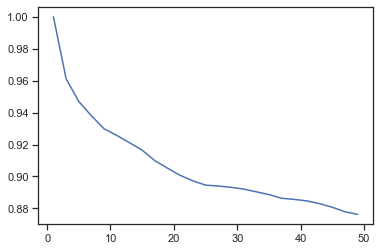

In [19]:
plt.plot(n_range, clf_gs.cv_results_["mean_train_score"]);

Очевидно, что для K=1  на тренировочном наборе данных мы находим ровно ту же точку, что и нужно предсказать, и чем больше её соседей мы берём — тем меньше точность. Посмотрим на тестовом наборе данных

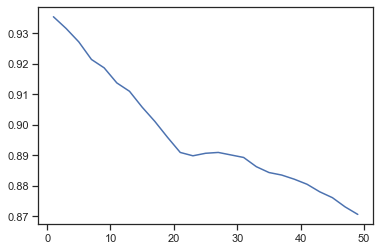

In [20]:
plt.plot(n_range, clf_gs.cv_results_["mean_test_score"]);

Проверим получившуюся модель:

In [21]:
cl1_2 = KNeighborsClassifier(**clf_gs.best_params_)
cl1_2.fit(X_train, Y_train)
target2_0 = cl1_2.predict(X_train)
target2_1 = cl1_2.predict(X_test)
accuracy_score(Y_train, target2_0), accuracy_score(Y_test, target2_1)

(1.0, 0.9374313940724479)